In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.4MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 1.5MB/s eta 0:00:011
    100% |████████████████████████████████| 1.7MB 870kB/s eta 0:00:011
    100% |████████████████████████████████| 419kB 3.3MB/s  eta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built future networkx
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

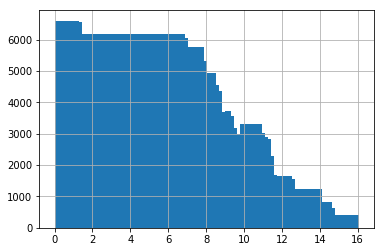

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


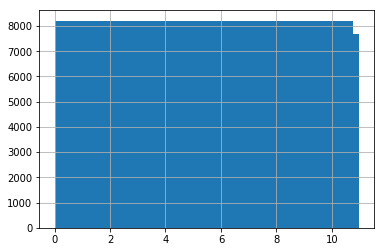

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [27]:
from hyperopt import fmin, tpe, hp


In [28]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [29]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=None,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[None,None],
                    verbose=100, early_stopping_rounds=100)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [31]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'regression_l1f2',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [32]:
best_mae=1e10

In [33]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,
          subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf,
         fair_c):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [34]:
space={
   'num_leaves': hp.uniform('num_leaves', 32,128 ),
    'reg_alpha':hp.loguniform('reg_alpha', np.log(0.01),np.log(10) ),
    'reg_lambda':hp.loguniform('reg_lambda', np.log(0.01),np.log(10) ),
    'max_depth':hp.uniform('max_depth',  3,10 ),
    'subsample':hp.uniform('subsample',  0.3,1 ),
    'colsample_bytree':hp.uniform('colsample_bytree',  0.3,1 ),
    'min_data_in_leaf':hp.loguniform('min_data_in_leaf', np.log(5),np.log(3000) ),
    'min_sum_hessian_in_leaf':hp.loguniform('min_sum_hessian_in_leaf', np.log(1e-3),np.log(3) ),
    'learning_rate':hp.loguniform('learning_rate', np.log(1e-3),np.log(0.01) ),
    'fair_c':hp.loguniform('fair_c', np.log(1e-3),np.log(0.1) ),
}

In [35]:
def objective(args):
    print args
    return lgbcv(**args)



In [36]:
best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print best

{'num_leaves': 83.13417883521646, 'reg_alpha': 0.015552491551915048, 'colsample_bytree': 0.792118086981165, 'learning_rate': 0.0010162419231814807, 'fair_c': 0.021005666266497896, 'subsample': 0.8135312777817059, 'reg_lambda': 0.44034807256347713, 'min_data_in_leaf': 1232.8811463661493, 'max_depth': 9.516700433348552, 'min_sum_hessian_in_leaf': 0.026766069756334332}
valid quake                                          
1                                                    
(379874, 450)                                        
(379874,)                                            
(29520, 450)                                         
(29520,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.8614	valid_1's l1: 2.00703    
[200]	training's l1: 1.30393	valid_1's l1: 1.52593   
[300]	training's l1: 1.09893	valid_1's l1: 1.41037   
[400]	training's l1: 0.990707	valid_1's l1: 1.35837  
[500]	training's l1: 0.92082

(391376, 450)                                        
(391376,)                                            
(18018, 450)                                         
(18018,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.86841	valid_1's l1: 1.96102   
[200]	training's l1: 1.30744	valid_1's l1: 1.61314   
[300]	training's l1: 1.10358	valid_1's l1: 1.5138    
[400]	training's l1: 0.993317	valid_1's l1: 1.46789  
[500]	training's l1: 0.919172	valid_1's l1: 1.44293  
[600]	training's l1: 0.865177	valid_1's l1: 1.42834  
[700]	training's l1: 0.825866	valid_1's l1: 1.4186   
[800]	training's l1: 0.793161	valid_1's l1: 1.41014  
[900]	training's l1: 0.763677	valid_1's l1: 1.40631  
[1000]	training's l1: 0.741781	valid_1's l1: 1.40407 
[1100]	training's l1: 0.722102	valid_1's l1: 1.40098 
[1200]	training's l1: 0.702432	valid_1's l1: 1.3971  
[1300]	training's l1: 0.68647	valid_1's l1: 1.39505  
[1400]	training's l

[600]	training's l1: 0.882722	valid_1's l1: 1.03524  
[700]	training's l1: 0.840853	valid_1's l1: 1.03058  
[800]	training's l1: 0.808349	valid_1's l1: 1.03019  
Early stopping, best iteration is:                   
[750]	training's l1: 0.823094	valid_1's l1: 1.02945
quake                                                
11                                                   
(1.0294464327433737, 750)                            
valid quake                                          
12                                                   
(386834, 450)                                        
(386834,)                                            
(22560, 450)                                         
(22560,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.87549	valid_1's l1: 1.77811   
[200]	training's l1: 1.32026	valid_1's l1: 1.25681   
[300]	training's l1: 1.11926	valid_1's l1: 1.16033   
[400]	training's l1: 

[200]	training's l1: 0.950635	valid_1's l1: 1.33409                          
[300]	training's l1: 0.900847	valid_1's l1: 1.33136                          
Early stopping, best iteration is:                                           
[253]	training's l1: 0.924974	valid_1's l1: 1.32864
quake                                                                        
2                                                                            
(1.32863500666551, 253)                                                      
valid quake                                                                  
3                                                                            
(386763, 450)                                                                
(386763,)                                                                    
(22631, 450)                                                                 
(22631,)                                                                     
Training unt

(384759,)                                                                    
(24635, 450)                                                                 
(24635,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.08275	valid_1's l1: 0.986831                          
[200]	training's l1: 0.976786	valid_1's l1: 0.940425                         
[300]	training's l1: 0.929212	valid_1's l1: 0.93829                          
Early stopping, best iteration is:                                           
[267]	training's l1: 0.944957	valid_1's l1: 0.935431
quake                                                                        
9                                                                            
(0.9354310959691728, 267)                                                    
valid quake                                                                  
10         

mean score                                                                   
1.1664308168787036                                                           
{'num_leaves': 79.06566907639613, 'reg_alpha': 0.027469701407844847, 'colsample_bytree': 0.564147359937569, 'learning_rate': 0.0024575095654156753, 'fair_c': 0.008550215134426218, 'subsample': 0.8367436572871703, 'reg_lambda': 0.2530406699398164, 'min_data_in_leaf': 1526.4464123366804, 'max_depth': 8.940227741455313, 'min_sum_hessian_in_leaf': 0.008007046033148859}
valid quake                                                                   
1                                                                             
(379874, 450)                                                                 
(379874,)                                                                     
(29520, 450)                                                                  
(29520,)                                                                      
Tr

(18018, 450)                                                                  
(18018,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.22736	valid_1's l1: 1.56593                            
[200]	training's l1: 0.9775	valid_1's l1: 1.44382                             
[300]	training's l1: 0.88433	valid_1's l1: 1.40922                            
[400]	training's l1: 0.824995	valid_1's l1: 1.39744                           
[500]	training's l1: 0.785233	valid_1's l1: 1.38836                           
[600]	training's l1: 0.752622	valid_1's l1: 1.38531                           
[700]	training's l1: 0.71758	valid_1's l1: 1.3855                             
Early stopping, best iteration is:                                            
[684]	training's l1: 0.723621	valid_1's l1: 1.3839
quake                                                                         
6

(1.0249079722710268, 308)                                                     
valid quake                                                                   
12                                                                            
(386834, 450)                                                                 
(386834,)                                                                     
(22560, 450)                                                                  
(22560,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.2391	valid_1's l1: 1.20662                             
[200]	training's l1: 0.992018	valid_1's l1: 1.04972                           
[300]	training's l1: 0.899521	valid_1's l1: 0.998697                          
[400]	training's l1: 0.843552	valid_1's l1: 0.974567                          
[500]	training's l1: 0.801304	valid_1's l1: 0.966153

2                                                                             
(373099, 450)                                                                 
(373099,)                                                                     
(36295, 450)                                                                  
(36295,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.78554	valid_1's l1: 1.99708                            
[200]	training's l1: 1.31446	valid_1's l1: 1.53129                            
[300]	training's l1: 1.2004	valid_1's l1: 1.41636                             
[400]	training's l1: 1.14023	valid_1's l1: 1.36856                            
[500]	training's l1: 1.10603	valid_1's l1: 1.34486                            
[600]	training's l1: 1.08547	valid_1's l1: 1.33021                            
[700]	training's l1: 1.07018	valid_1's l1: 1.3219   

(1.2876384314720553, 1857)                                                    
valid quake                                                                   
6                                                                             
(391376, 450)                                                                 
(391376,)                                                                     
(18018, 450)                                                                  
(18018,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.80334	valid_1's l1: 1.85211                            
[200]	training's l1: 1.33064	valid_1's l1: 1.53098                            
[300]	training's l1: 1.21426	valid_1's l1: 1.45431                            
[400]	training's l1: 1.1498	valid_1's l1: 1.41816                             
[500]	training's l1: 1.11417	valid_1's l1: 1.39778  

[1300]	training's l1: 1.05137	valid_1's l1: 0.915591                          
[1400]	training's l1: 1.04434	valid_1's l1: 0.91514                           
[1500]	training's l1: 1.03712	valid_1's l1: 0.914652                          
[1600]	training's l1: 1.0298	valid_1's l1: 0.913879                           
[1700]	training's l1: 1.02367	valid_1's l1: 0.912331                          
[1800]	training's l1: 1.01744	valid_1's l1: 0.912466                          
Early stopping, best iteration is:                                            
[1766]	training's l1: 1.01942	valid_1's l1: 0.912264
quake                                                                         
9                                                                             
(0.9122636179656742, 1766)                                                    
valid quake                                                                   
10                                                                            

[900]	training's l1: 1.0715	valid_1's l1: 1.07435                             
[1000]	training's l1: 1.0633	valid_1's l1: 1.06889                            
[1100]	training's l1: 1.05604	valid_1's l1: 1.06453                           
[1200]	training's l1: 1.04949	valid_1's l1: 1.06179                           
[1300]	training's l1: 1.04267	valid_1's l1: 1.0619                            
Early stopping, best iteration is:                                            
[1221]	training's l1: 1.04812	valid_1's l1: 1.06146
quake                                                                         
13                                                                            
(1.0614593696123276, 1221)                                                    
valid quake                                                                   
14                                                                            
(371633, 450)                                                                 


[600]	training's l1: 0.738639	valid_1's l1: 0.854396                         
[700]	training's l1: 0.70099	valid_1's l1: 0.849708                          
[800]	training's l1: 0.660664	valid_1's l1: 0.850321                         
Early stopping, best iteration is:                                           
[714]	training's l1: 0.695484	valid_1's l1: 0.849087
quake                                                                        
3                                                                            
(0.849087453382081, 714)                                                     
valid quake                                                                  
4                                                                            
(376914, 450)                                                                
(376914,)                                                                    
(32480, 450)                                                                 
(32480,)   

Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.31207	valid_1's l1: 1.24287                           
[200]	training's l1: 1.03495	valid_1's l1: 1.01567                           
[300]	training's l1: 0.913694	valid_1's l1: 0.942649                         
[400]	training's l1: 0.841936	valid_1's l1: 0.926172                         
[500]	training's l1: 0.786079	valid_1's l1: 0.921111                         
[600]	training's l1: 0.738877	valid_1's l1: 0.921715                           
[700]	training's l1: 0.698804	valid_1's l1: 0.919434                           
[800]	training's l1: 0.660247	valid_1's l1: 0.922498                           
Early stopping, best iteration is:                                             
[726]	training's l1: 0.688416	valid_1's l1: 0.918784
quake                                                                          
9                                                                              

15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.30999	valid_1's l1: 1.26701                             
[200]	training's l1: 1.02743	valid_1's l1: 1.17097                             
[300]	training's l1: 0.907001	valid_1's l1: 1.15052                            
[400]	training's l1: 0.832946	valid_1's l1: 1.14265                            
[500]	training's l1: 0.77717	valid_1's l1: 1.13596                             
[600]	training's l1: 0.732189	valid_1's l1: 1.13047                            
[700]	training's l1: 0.693604	valid_1's 

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.983751	valid_1's l1: 1.38545                            
[200]	training's l1: 0.88084	valid_1's l1: 1.35346                             
[300]	training's l1: 0.804761	valid_1's l1: 1.36831                            
Early stopping, best iteration is:                                             
[202]	training's l1: 0.87955	valid_1's l1: 1.35298
quake                                                                          
6                                                                              
(1.3529756310625638, 202)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                            

[200]	training's l1: 0.894663	valid_1's l1: 1.06055                            
Early stopping, best iteration is:                                             
[162]	training's l1: 0.926685	valid_1's l1: 1.05849
quake                                                                          
13                                                                             
(1.0584927614473119, 162)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.      

(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.21267	valid_1's l1: 1.31245                             
[200]	training's l1: 0.93151	valid_1's l1: 1.13379                             
[300]	training's l1: 0.802682	valid_1's l1: 1.11587                            
[400]	training's l1: 0.721563	valid_1's l1: 1.11669                            
Early stopping, best iteration is:                                             
[314]	training's l1: 0.789547	valid_1's l1: 1.1153
quake                                                                          
4                                                                              
(1.1152998006490908, 314)                                            

9                                                                              
(0.9180566313140631, 569)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.21808	valid_1's l1: 1.2661                              
[200]	training's l1: 0.93411	valid_1's l1: 1.08438                             
[300]	training's l1: 0.805312	valid_1's l1: 1.05187                            
[400]	training's l1: 0.723221	valid_1's 

[600]	training's l1: 0.625924	valid_1's l1: 1.11769                            
[700]	training's l1: 0.585197	valid_1's l1: 1.11629                            
Early stopping, best iteration is:                                             
[647]	training's l1: 0.608087	valid_1's l1: 1.11406
quake                                                                          
15                                                                             
(1.1140554200534925, 647)                                                      
mean score                                                                     
1.1695126519837113                                                             
{'num_leaves': 91.79062867513679, 'reg_alpha': 0.015397178787487887, 'colsample_bytree': 0.8254594112009055, 'learning_rate': 0.003064789258563503, 'fair_c': 0.005233030523335201, 'subsample': 0.7220662787852872, 'reg_lambda': 7.388251182704662, 'min_data_in_leaf': 70.23181502213866, 'max_depth': 6.02575190

(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.15559	valid_1's l1: 1.50559                             
[200]	training's l1: 0.954119	valid_1's l1: 1.41204                            
[300]	training's l1: 0.876861	valid_1's l1: 1.38853                            
[400]	training's l1: 0.826789	valid_1's l1: 1.36992                            
[500]	training's l1: 0.786704	valid_1's l1: 1.36401                            
[600]	training's l1: 0.737169	valid_1's l1: 1.36719                            
Early stopping, best iteration is:                                             
[538]	training's l1: 0.767068	valid_1's l1: 1.36297
quake                                                               

(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.17068	valid_1's l1: 1.15074                             
[200]	training's l1: 0.97248	valid_1's l1: 1.00454                             
[300]	training's l1: 0.897446	valid_1's l1: 0.959719                           
[400]	training's l1: 0.847363	valid_1's l1: 0.948188                           
[500]	training's l1: 0.801994	valid_1's l1: 0.940176                           
[600]	training's l1: 0.754979	valid_1's l1: 0.940078                           
Early stopping, best iteration is:                                             
[520]	training's l1: 0.793383	valid_1's l1: 0.937822
quake                                                              

(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.12613	valid_1's l1: 0.912724                            
[200]	training's l1: 1.06698	valid_1's l1: 0.861177                            
[300]	training's l1: 1.03141	valid_1's l1: 0.856847                            
[400]	training's l1: 1.00489	valid_1's l1: 0.858672                            
Early stopping, best iteration is:                                             
[328]	training's l1: 1.02325	valid_1's l1: 0.855467
quake                                                                          
3                                                                              
(0.8554673940822947, 328)                                           

(0.9142703940527234, 256)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.12251	valid_1's l1: 1.03264                             
[200]	training's l1: 1.06223	valid_1's l1: 1.00022                             
[300]	training's l1: 1.02658	valid_1's l1: 0.993614                            
Early stopping, best iteration is:                                             
[293]	training's l1: 1.02883	valid_1's l

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.29064	valid_1's l1: 1.56073                             
[200]	training's l1: 0.924682	valid_1's l1: 1.3596                             
[300]	training's l1: 0.771659	valid_1's l1: 1.29301                            
[400]	training's l1: 0.673264	valid_1's l1: 1.26249                            
[500]	training's l1: 0.603475	valid_1's l1: 1.2483                             
[600]	training's l1: 0.550584	valid_1's l1: 1.23741                            
[700]	training's l1: 0.510297	valid_1's l1: 1.23329                            
[800]	training's l1: 0.468952	valid_1's l1: 1.23069                            
[900]	training's l1: 0.427974	valid_1's l1: 1.22778                            
[1000]	training's l1: 0.393524	valid_1's l1: 1.22521                           
[1100]	training's l1: 0.364083	valid_1's l1: 1.22302                           
Early stopping, best iteration is:      

[600]	training's l1: 0.554294	valid_1's l1: 1.42424                            
[700]	training's l1: 0.511924	valid_1's l1: 1.42005                            
[800]	training's l1: 0.471629	valid_1's l1: 1.41577                            
[900]	training's l1: 0.43089	valid_1's l1: 1.4147                              
[1000]	training's l1: 0.395793	valid_1's l1: 1.41335                           
[1100]	training's l1: 0.36758	valid_1's l1: 1.41253                            
[1200]	training's l1: 0.341107	valid_1's l1: 1.41272                           
Early stopping, best iteration is:                                             
[1111]	training's l1: 0.364437	valid_1's l1: 1.41196
quake                                                                          
6                                                                              
(1.4119617285496244, 1111)                                                     
valid quake                                                        

Early stopping, best iteration is:                                             
[401]	training's l1: 0.681579	valid_1's l1: 1.03803
quake                                                                          
11                                                                             
(1.0380255102522815, 401)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.31053	valid_1's l1: 1.27794                  

(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.06617	valid_1's l1: 1.32308                              
[200]	training's l1: 1.01105	valid_1's l1: 1.32109                              
Early stopping, best iteration is:                                              
[142]	training's l1: 1.03963	valid_1's l1: 1.31352
quake                                                                           
2                                                                               
(1.3135159355711807, 142)                                                       
valid quake                                               

9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.09706	valid_1's l1: 0.929698                             
[200]	training's l1: 1.04139	valid_1's l1: 0.91687                              
Early stopping, best iteration is:                                              
[192]	training's l1: 1.04479	valid_1's l1: 0.91548
quake                                                                           
9                                                                               
(0.9154803389542211, 192)                                 

valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.21297	valid_1's l1: 1.48265                              
[200]	training's l1: 0.917775	valid_1's l1: 1.34173                             
[300]	training's l1: 0.786872	valid_1's l1: 1.28578                             
[400]	training's l1: 0.700423	valid_1's l1: 1.26401                             
[500]	training's l1: 0.636306	valid_1's l1: 1.25356                             
[600]	training's l1: 0.58569

[500]	training's l1: 0.64823	valid_1's l1: 1.40188                              
[600]	training's l1: 0.598952	valid_1's l1: 1.39551                             
[700]	training's l1: 0.557468	valid_1's l1: 1.39384                             
[800]	training's l1: 0.511043	valid_1's l1: 1.39246                             
[900]	training's l1: 0.473357	valid_1's l1: 1.39049                             
Early stopping, best iteration is:                                              
[889]	training's l1: 0.477371	valid_1's l1: 1.38996
quake                                                                           
6                                                                               
(1.3899573404461787, 889)                                                       
valid quake                                                                     
7                                                                               
(368154, 450)                                            

12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.2315	valid_1's l1: 1.2302                                
[200]	training's l1: 0.938992	valid_1's l1: 1.06193                             
[300]	training's l1: 0.802251	valid_1's l1: 1.00073                             
[400]	training's l1: 0.72095	valid_1's l1: 0.972747                             
[500]	training's l1: 0.656296	valid_1's l1: 0.962415                            
[600]	training's l1: 0.60543	valid_1's l1: 0.957767                             
[700]	training's l1: 0.56238

2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.12607	valid_1's l1: 1.5178                               
[200]	training's l1: 0.885351	valid_1's l1: 1.4027                              
[300]	training's l1: 0.790718	valid_1's l1: 1.37704                             
[400]	training's l1: 0.727221	valid_1's l1: 1.36795                             
[500]	training's l1: 0.678617	valid_1's l1: 1.36567                             
[600]	training's l1: 0.624349	valid_1's l1: 1.36356                             
Early stopping, best iterati

valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.13593	valid_1's l1: 1.54039                              
[200]	training's l1: 0.899056	valid_1's l1: 1.42115                             
[300]	training's l1: 0.800547	valid_1's l1: 1.3775                              
[400]	training's l1: 0.74	valid_1's l1: 1.36041                                 
[500]	training's l1: 0.694976	valid_1's l1: 1.35622                             
[600]	training's l1: 0.64348

Early stopping, best iteration is:                                              
[607]	training's l1: 0.646512	valid_1's l1: 1.0644
quake                                                                           
13                                                                              
(1.0644006473953331, 607)                                                       
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)                                                                    
(37761,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.11303	valid_1's l1: 1.57582        

[600]	training's l1: 0.692481	valid_1's l1: 0.862399                            
[700]	training's l1: 0.647698	valid_1's l1: 0.856992                            
[800]	training's l1: 0.61123	valid_1's l1: 0.853041                             
[900]	training's l1: 0.580887	valid_1's l1: 0.851618                            
[1000]	training's l1: 0.553822	valid_1's l1: 0.851545                           
Early stopping, best iteration is:                                              
[970]	training's l1: 0.562162	valid_1's l1: 0.850372
quake                                                                           
3                                                                               
(0.8503717030436033, 970)                                                       
valid quake                                                                     
4                                                                               
(376914, 450)                                           

[500]	training's l1: 0.725448	valid_1's l1: 1.3909                              
[600]	training's l1: 0.671295	valid_1's l1: 1.37723                             
[700]	training's l1: 0.630994	valid_1's l1: 1.36804                             
[800]	training's l1: 0.599571	valid_1's l1: 1.36298                             
[900]	training's l1: 0.56902	valid_1's l1: 1.36479                              
Early stopping, best iteration is:                                              
[801]	training's l1: 0.599277	valid_1's l1: 1.36293
quake                                                                           
8                                                                               
(1.3629267340175335, 801)                                                       
valid quake                                                                     
9                                                                               
(384759, 450)                                            

[100]	training's l1: 1.52244	valid_1's l1: 1.53434                              
[200]	training's l1: 1.06384	valid_1's l1: 1.26993                              
[300]	training's l1: 0.901336	valid_1's l1: 1.17176                             
[400]	training's l1: 0.802123	valid_1's l1: 1.11996                             
[500]	training's l1: 0.733116	valid_1's l1: 1.09453                             
[600]	training's l1: 0.67918	valid_1's l1: 1.08188                              
[700]	training's l1: 0.636036	valid_1's l1: 1.07748                             
[800]	training's l1: 0.603389	valid_1's l1: 1.07302                             
[900]	training's l1: 0.573035	valid_1's l1: 1.07074                             
[1000]	training's l1: 0.542455	valid_1's l1: 1.07023                            
[1100]	training's l1: 0.508349	valid_1's l1: 1.07276                            
Early stopping, best iteration is:                                              
[1015]	training's l1: 0.5373

[1100]	training's l1: 1.02776	valid_1's l1: 1.31173                             
Early stopping, best iteration is:                                              
[1030]	training's l1: 1.03422	valid_1's l1: 1.31111
quake                                                                           
2                                                                               
(1.3111051875024737, 1030)                                                      
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                                                    
(22631,)                                                                        
Training until validation scores don't improve for 100 ro

quake                                                                           
6                                                                               
(1.3663214777370924, 1581)                                                      
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)                                                                    
(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.64467	valid_1's l1: 1.89836                              
[200]	training's l1: 1.25554	valid_1's l1: 1.53883                              
[300]	training's l1: 1.15752

10                                                                              
(0.9978133348316959, 1432)                                                      
valid quake                                                                     
11                                                                              
(381198, 450)                                                                   
(381198,)                                                                       
(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.68135	valid_1's l1: 1.61598                              
[200]	training's l1: 1.2952	valid_1's l1: 1.15095                               
[300]	training's l1: 1.1951	valid_1's l1: 1.04581                               
[400]	training's l1: 1.14452

mean score                                                                      
1.155242637387913                                                               
{'num_leaves': 60.89128522240051, 'reg_alpha': 8.393675630157217, 'colsample_bytree': 0.713173502586602, 'learning_rate': 0.003014305461194174, 'fair_c': 0.007778430534541899, 'subsample': 0.5517780339886863, 'reg_lambda': 2.9220807228561494, 'min_data_in_leaf': 5.894463763755169, 'max_depth': 7.484083395858973, 'min_sum_hessian_in_leaf': 0.0015908855859051102}
valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                             

(18018, 450)                                                                    
(18018,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.13615	valid_1's l1: 1.49634                              
[200]	training's l1: 0.908505	valid_1's l1: 1.41242                             
[300]	training's l1: 0.813491	valid_1's l1: 1.39299                             
[400]	training's l1: 0.749559	valid_1's l1: 1.38521                             
[500]	training's l1: 0.700276	valid_1's l1: 1.37664                             
[600]	training's l1: 0.646914	valid_1's l1: 1.38157                             
Early stopping, best iteration is:                                              
[528]	training's l1: 0.685375	valid_1's l1: 1.37541
quake                                                                           
6                                                        

(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.14988	valid_1's l1: 1.16024                              
[200]	training's l1: 0.927503	valid_1's l1: 1.01166                             
[300]	training's l1: 0.832353	valid_1's l1: 0.973495                            
[400]	training's l1: 0.76534	valid_1's l1: 0.954964                             
[500]	training's l1: 0.711911	valid_1's l1: 0.950782                            
[600]	training's l1: 0.657302	valid_1's l1: 0.948975                            
[700]	training's l1: 0.617837	valid_1's l1: 0.948124                            
[800]	training's l1: 0.580286	valid_1's l1: 0.947535                            
Early stopping, best iteration is:                                              
[762]	training's l1: 0.59335

(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.45788	valid_1's l1: 1.76809                              
[200]	training's l1: 1.07706	valid_1's l1: 1.46562                              
[300]	training's l1: 0.945758	valid_1's l1: 1.39721                             
[400]	training's l1: 0.872907	valid_1's l1: 1.3682                              
[500]	training's l1: 0.82342	valid_1's l1: 1.35541                              
[600]	training's l1: 0.779806	valid_1's l1: 1.3469                              
[700]	training's l1: 0.745871	valid_1's l1: 1.34395                             
Early stopping, best iteration is:                                              
[687]	training's l1: 0.749857	valid_1's l1: 1.34308
quake                                                                           
2                                                        

(368154,)                                                                       
(41240, 450)                                                                    
(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.44913	valid_1's l1: 1.81669                              
[200]	training's l1: 1.06684	valid_1's l1: 1.52042                              
[300]	training's l1: 0.932371	valid_1's l1: 1.43461                             
[400]	training's l1: 0.858865	valid_1's l1: 1.4048                              
[500]	training's l1: 0.807232	valid_1's l1: 1.39508                             
[600]	training's l1: 0.765217	valid_1's l1: 1.38768                             
[700]	training's l1: 0.73119	valid_1's l1: 1.38403                              
[800]	training's l1: 0.702039	valid_1's l1: 1.38223                             
[900]	training's l1: 0.67246

(1.028130557000482, 537)                                                        
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.48963	valid_1's l1: 1.40017                              
[200]	training's l1: 1.10818	valid_1's l1: 1.13114                              
[300]	training's l1: 0.973089	valid_1's l1: 1.041                               
[400]	training's l1: 0.896574	valid_1's l1: 0.997757                            
[500]	training's l1: 0.84501

[400]	training's l1: 0.909523	valid_1's l1: 1.27468                             
[500]	training's l1: 0.85931	valid_1's l1: 1.25935                              
[600]	training's l1: 0.818582	valid_1's l1: 1.25176                             
[700]	training's l1: 0.784719	valid_1's l1: 1.24442                             
[800]	training's l1: 0.754555	valid_1's l1: 1.23997                             
[900]	training's l1: 0.726601	valid_1's l1: 1.2366                              
[1000]	training's l1: 0.700723	valid_1's l1: 1.23242                            
[1100]	training's l1: 0.67828	valid_1's l1: 1.23017                             
[1200]	training's l1: 0.657422	valid_1's l1: 1.22883                            
[1300]	training's l1: 0.636971	valid_1's l1: 1.22675                            
[1400]	training's l1: 0.618621	valid_1's l1: 1.22607                            
[1500]	training's l1: 0.60105	valid_1's l1: 1.22527                             
[1600]	training's l1: 0.5840

(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)                                                                    
(18018,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.43012	valid_1's l1: 1.66185                              
[200]	training's l1: 1.10223	valid_1's l1: 1.46615                              
[300]	training's l1: 0.980349	valid_1's l1: 1.42362                             
[400]	training's l1: 0.911686	valid_1's l1: 1.40414                             
[500]	training's l1: 0.861916	valid_1's l1: 1.39811                             
[600]	training's l1: 0.820968	valid_1's l1: 1.39033                             
[700]	training's l1: 0.787241	valid_1's l1: 1.38849                             
[800]	training's l1: 0.75814

valid quake                                                                     
11                                                                              
(381198, 450)                                                                   
(381198,)                                                                       
(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.44499	valid_1's l1: 1.4289                               
[200]	training's l1: 1.11979	valid_1's l1: 1.11325                              
[300]	training's l1: 0.996041	valid_1's l1: 1.04185                             
[400]	training's l1: 0.925176	valid_1's l1: 1.03093                             
Early stopping, best iteration is:                                              
[384]	training's l1: 0.93501

valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.985646	valid_1's l1: 1.30145                             
[200]	training's l1: 0.869105	valid_1's l1: 1.2572                              
[300]	training's l1: 0.791378	valid_1's l1: 1.24505                             
Early stopping, best iteration is:                                              
[297]	training's l1: 0.793662	valid_1's l1: 1.24476
quake                                                    

(1.3845583151334089, 206)                                                       
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.987442	valid_1's l1: 1.43058                             
[200]	training's l1: 0.873039	valid_1's l1: 1.35364                             
[300]	training's l1: 0.79765	valid_1's l1: 1.34954                              
Early stopping, best iteration is:                                              
[287]	training's l1: 0.80903

quake                                                                           
14                                                                              
(1.4343458199048045, 143)                                                       
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)                                                                    
(24179,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.00421	valid_1's l1: 1.17333                              
[200]	training's l1: 0.890534	valid_1's l1: 1.15058                             
[300]	training's l1: 0.81410

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.19702	valid_1's l1: 1.47927                              
[200]	training's l1: 0.990898	valid_1's l1: 1.36855                             
[300]	training's l1: 0.905103	valid_1's l1: 1.33815                             
[400]	training's l1: 0.848245	valid_1's l1: 1.33405                             
[500]	training's l1: 0.80227	valid_1's l1: 1.32962                              
[600]	training's l1: 0.763799	valid_1's l1: 1.32966                             
[700]	training's l1: 0.730245	valid_1's l1: 1.32653                             
[800]	training's l1: 0.703022	valid_1's l1: 1.33312                             
Early stopping, best iteration is:                                              
[701]	training's l1: 0.729948	valid_1's l1: 1.3264
quake                                                                           
5                                                         

11                                                                              
(381198, 450)                                                                   
(381198,)                                                                       
(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.21423	valid_1's l1: 1.17427                              
[200]	training's l1: 1.00489	valid_1's l1: 1.03785                              
[300]	training's l1: 0.916355	valid_1's l1: 1.03292                             
Early stopping, best iteration is:                                              
[270]	training's l1: 0.938806	valid_1's l1: 1.03104
quake                                                                           
11                                                       

Early stopping, best iteration is:                                              
[491]	training's l1: 1.008	valid_1's l1: 1.22464
quake                                                                           
1                                                                               
(1.2246378961827495, 491)                                                       
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.17654	valid_1's l1: 1.39995          

quake                                                                           
7                                                                               
(1.3605097602753167, 375)                                                       
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.18907	valid_1's l1: 1.51889                              
[200]	training's l1: 1.08555	valid_1's l1: 1.40857                              
[300]	training's l1: 1.05251

[400]	training's l1: 1.04157	valid_1's l1: 1.06692                              
Early stopping, best iteration is:                                              
[374]	training's l1: 1.04855	valid_1's l1: 1.0631
quake                                                                           
13                                                                              
(1.0631044669014469, 374)                                                       
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)                                                                    
(37761,)                                                                        
Training until validation scores don't improve for 100 roun

[400]	training's l1: 1.13165	valid_1's l1: 0.935344                            
[500]	training's l1: 1.09246	valid_1's l1: 0.896548                            
[600]	training's l1: 1.06848	valid_1's l1: 0.878494                            
[700]	training's l1: 1.05043	valid_1's l1: 0.867501                            
[800]	training's l1: 1.03589	valid_1's l1: 0.859974                            
[900]	training's l1: 1.02272	valid_1's l1: 0.853576                            
[1000]	training's l1: 1.01186	valid_1's l1: 0.848574                           
[1100]	training's l1: 1.00148	valid_1's l1: 0.844378                           
[1200]	training's l1: 0.992401	valid_1's l1: 0.841596                          
[1300]	training's l1: 0.980363	valid_1's l1: 0.839899                          
[1400]	training's l1: 0.967985	valid_1's l1: 0.83958                           
Early stopping, best iteration is:                                             
[1338]	training's l1: 0.975854	valid_1's

[800]	training's l1: 0.99487	valid_1's l1: 1.35904                             
[900]	training's l1: 0.981434	valid_1's l1: 1.35575                            
[1000]	training's l1: 0.968869	valid_1's l1: 1.3537                            
[1100]	training's l1: 0.958026	valid_1's l1: 1.35166                           
[1200]	training's l1: 0.949018	valid_1's l1: 1.35121                           
[1300]	training's l1: 0.93675	valid_1's l1: 1.35132                            
Early stopping, best iteration is:                                             
[1246]	training's l1: 0.944143	valid_1's l1: 1.35043
quake                                                                          
7                                                                              
(1.3504337687829129, 1246)                                                     
valid quake                                                                    
8                                                                  

[700]	training's l1: 1.04643	valid_1's l1: 1.00256                             
Early stopping, best iteration is:                                             
[603]	training's l1: 1.06439	valid_1's l1: 1.00178
quake                                                                          
11                                                                             
(1.001782459049712, 603)                                                       
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.       

(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.14203	valid_1's l1: 1.33401                              
[200]	training's l1: 1.03293	valid_1's l1: 1.25091                              
[300]	training's l1: 0.987714	valid_1's l1: 1.23527                             
[400]	training's l1: 0.95076	valid_1's l1: 1.23322                              
Early stopping, best iteration is:                                              
[385]	training's l1: 0.956451	valid_1's l1: 1.23176
quake                                                                           
1                                                        

(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.12621	valid_1's l1: 1.43923                              
[200]	training's l1: 1.01444	valid_1's l1: 1.36027                              
[300]	training's l1: 0.969845	valid_1's l1: 1.3488                              
[400]	training's l1: 0.930494	valid_1's l1: 1.35007                             
Early stopping, best iteration is:                                              
[348]	training's l1: 0.951648	valid_1's l1: 1.34686
quake                                                                           
7                                                                               
(1.3468577082126345, 348)                                                       
valid quake                                                                     
8                                                        

Early stopping, best iteration is:                                              
[358]	training's l1: 0.979066	valid_1's l1: 1.0527
quake                                                                           
13                                                                              
(1.0526958191284284, 358)                                                       
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)                                                                    
(37761,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.12222	valid_1's l1: 1.47492        

(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.04858	valid_1's l1: 1.34196                             
[200]	training's l1: 0.976339	valid_1's l1: 1.31377                            
[300]	training's l1: 0.917879	valid_1's l1: 1.31787                            
Early stopping, best iteration is:                                             
[222]	training's l1: 0.962139	valid_1's l1: 1.31002
quake                                                                          
5                                                                              
(1.3100242653237653, 222)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                       

(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.06504	valid_1's l1: 0.987088                            
[200]	training's l1: 0.990598	valid_1's l1: 0.949734                           
Early stopping, best iteration is:                                             
[195]	training's l1: 0.99437	valid_1's l1: 0.947414
quake                                                                          
12                                                                             
(0.9474138199605164, 195)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                           

[1300]	training's l1: 0.968843	valid_1's l1: 1.33367                           
[1400]	training's l1: 0.95951	valid_1's l1: 1.33219                            
[1500]	training's l1: 0.947252	valid_1's l1: 1.331                             
Early stopping, best iteration is:                                             
[1452]	training's l1: 0.953478	valid_1's l1: 1.33053
quake                                                                          
2                                                                              
(1.3305269879416275, 1452)                                                     
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                       

[1300]	training's l1: 0.977192	valid_1's l1: 1.352                             
[1400]	training's l1: 0.96886	valid_1's l1: 1.35002                            
[1500]	training's l1: 0.957879	valid_1's l1: 1.34933                           
[1600]	training's l1: 0.946991	valid_1's l1: 1.34963                           
Early stopping, best iteration is:                                             
[1522]	training's l1: 0.95565	valid_1's l1: 1.34882
quake                                                                          
6                                                                              
(1.3488187390148094, 1522)                                                     
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                           

[600]	training's l1: 1.08043	valid_1's l1: 1.03752                             
[700]	training's l1: 1.05946	valid_1's l1: 1.0287                              
[800]	training's l1: 1.04275	valid_1's l1: 1.02191                             
[900]	training's l1: 1.02946	valid_1's l1: 1.0157                              
[1000]	training's l1: 1.01787	valid_1's l1: 1.01108                            
[1100]	training's l1: 1.00735	valid_1's l1: 1.00779                            
[1200]	training's l1: 0.998316	valid_1's l1: 1.00522                           
[1300]	training's l1: 0.990412	valid_1's l1: 1.00128                           
[1400]	training's l1: 0.983043	valid_1's l1: 0.999725                          
[1500]	training's l1: 0.971817	valid_1's l1: 1.00022                           
Early stopping, best iteration is:                                             
[1407]	training's l1: 0.982415	valid_1's l1: 0.999656
quake                                                             

[700]	training's l1: 1.02432	valid_1's l1: 1.42354                             
[800]	training's l1: 1.00862	valid_1's l1: 1.42441                             
Early stopping, best iteration is:                                             
[745]	training's l1: 1.01723	valid_1's l1: 1.42229
quake                                                                          
14                                                                             
(1.4222850599078307, 745)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                             

(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.1125	valid_1's l1: 1.3919                               
[200]	training's l1: 0.980417	valid_1's l1: 1.31226                            
[300]	training's l1: 0.926013	valid_1's l1: 1.29752                            
Early stopping, best iteration is:                                             
[295]	training's l1: 0.928324	valid_1's l1: 1.29679
quake                                                                          
5                                                                              
(1.2967850722523637, 295)                                                      
valid quake                                                         

Early stopping, best iteration is:                                             
[172]	training's l1: 1.0178	valid_1's l1: 1.0154
quake                                                                          
11                                                                             
(1.0154034853975362, 172)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.12714	valid_1's l1: 1.06718                     

(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.04413	valid_1's l1: 0.857151                            
[200]	training's l1: 0.966349	valid_1's l1: 0.836379                           
Early stopping, best iteration is:                                             
[193]	training's l1: 0.971841	valid_1's l1: 0.834637
quake                                                                          
3                                                                              
(0.8346365190775841, 193)                                                      
valid quake                                                        

[200]	training's l1: 0.959362	valid_1's l1: 1.00145                            
Early stopping, best iteration is:                                             
[194]	training's l1: 0.963276	valid_1's l1: 0.999637
quake                                                                          
10                                                                             
(0.9996369231860298, 194)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.     

[200]	training's l1: 1.04674	valid_1's l1: 1.32129                             
[300]	training's l1: 1.01351	valid_1's l1: 1.32429                             
Early stopping, best iteration is:                                             
[245]	training's l1: 1.03074	valid_1's l1: 1.31627
quake                                                                          
2                                                                              
(1.3162684975818035, 245)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                             

9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.15079	valid_1's l1: 0.969204                            
[200]	training's l1: 1.07851	valid_1's l1: 0.925706                            
[300]	training's l1: 1.04576	valid_1's l1: 0.914802                            
[400]	training's l1: 1.0182	valid_1's l1: 0.913698                             
[500]	training's l1: 0.994272	valid_1's l1: 0.912083                           
[600]	training's l1: 0.973811	valid_1's l1: 0.911334                           
Early stopping, best iteration is:      

[200]	training's l1: 1.06924	valid_1's l1: 1.128                               
Early stopping, best iteration is:                                             
[178]	training's l1: 1.07845	valid_1's l1: 1.121
quake                                                                          
15                                                                             
(1.1209976340704042, 178)                                                      
mean score                                                                     
1.1484630371345892                                                             
{'num_leaves': 91.08509465517433, 'reg_alpha': 0.26486161601330876, 'colsample_bytree': 0.4943006456221485, 'learning_rate': 0.006097301680976549, 'fair_c': 0.02621616570152046, 'subsample': 0.518836107721618, 'reg_lambda': 0.03831180489140555, 'min_data_in_leaf': 101.1296023512607, 'max_depth': 3.2735118492150113, 'min_sum_hessian_in_leaf': 1.3073922742269337}
valid quake                

quake                                                                          
6                                                                              
(1.3391764993297903, 480)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10522	valid_1's l1: 1.39762                             
[200]	training's l1: 1.0386	valid_1's l1: 1.36431                              
[300]	training's l1: 1.00314	valid_1's l

(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13164	valid_1's l1: 1.14168                             
[200]	training's l1: 1.06399	valid_1's l1: 1.06869                             
[300]	training's l1: 1.02889	valid_1's l1: 1.05815                             
[400]	training's l1: 1.00153	valid_1's l1: 1.05686                             
Early stopping, best iteration is:                                             
[325]	training's l1: 1.02169	valid_1's l1: 1.05533
quake                                                                          
13                                                                             
(1.055331297111438, 325)                                                       
valid quake                                                                    
14                                                                   

quake                                                                          
4                                                                              
(1.087013704454056, 203)                                                       
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.05911	valid_1's l1: 1.30066                             
[200]	training's l1: 0.992053	valid_1's l1: 1.2759                             
[300]	training's l1: 0.940552	valid_1's 

quake                                                                          
11                                                                             
(1.0165451911064327, 91)                                                       
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.07782	valid_1's l1: 0.96837                             
[200]	training's l1: 1.01	valid_1's l1: 0.92859                                
[300]	training's l1: 0.957868	valid_1's 

3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.24225	valid_1's l1: 1.03903                             
[200]	training's l1: 1.12609	valid_1's l1: 0.912228                            
[300]	training's l1: 1.09126	valid_1's l1: 0.886368                            
[400]	training's l1: 1.06909	valid_1's l1: 0.873223                            
[500]	training's l1: 1.05008	valid_1's l1: 0.868701                            
[600]	training's l1: 1.03148	valid_1's l1: 0.871993                            
Early stopping, best iteration is:      

Early stopping, best iteration is:                                             
[694]	training's l1: 0.993413	valid_1's l1: 1.37704
quake                                                                          
8                                                                              
(1.3770435768214289, 694)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.24368	valid_1's l1: 1.05763                  

Early stopping, best iteration is:                                             
[214]	training's l1: 1.07532	valid_1's l1: 1.45491
quake                                                                          
14                                                                             
(1.45490810068814, 214)                                                        
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.24013	valid_1's l1: 1.14751                   

valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.05435	valid_1's l1: 1.42028                             
[200]	training's l1: 0.945091	valid_1's l1: 1.37185                            
[300]	training's l1: 0.8874	valid_1's l1: 1.36029                              
[400]	training's l1: 0.83211	valid_1's l1: 1.3634                              
Early stopping, best iteration is:                                             
[323]	training's l1: 0.872188	valid_1's 

[500]	training's l1: 0.796845	valid_1's l1: 0.944915                           
Early stopping, best iteration is:                                             
[464]	training's l1: 0.810035	valid_1's l1: 0.941719
quake                                                                          
12                                                                             
(0.9417185159660784, 464)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.     

(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.945633	valid_1's l1: 1.09165                            
[200]	training's l1: 0.815944	valid_1's l1: 1.09947                            
Early stopping, best iteration is:                                             
[125]	training's l1: 0.903583	valid_1's l1: 1.09021
quake                                                                          
4                                                                              
(1.0902127213055766, 125)                                                      
valid quake                                                                    
5                                                                   

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.952197	valid_1's l1: 1.0272                             
[200]	training's l1: 0.827641	valid_1's l1: 1.03274                            
Early stopping, best iteration is:                                             
[126]	training's l1: 0.909265	valid_1's l1: 1.0222
quake                                                                          
11                                                                             
(1.0221957992225092, 126)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                         

valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13305	valid_1's l1: 0.933203                            
[200]	training's l1: 1.03984	valid_1's l1: 0.860167                            
[300]	training's l1: 0.997063	valid_1's l1: 0.842022                           
Early stopping, best iteration is:                                             
[297]	training's l1: 0.998293	valid_1's l1: 0.840991
quake                                                              

Early stopping, best iteration is:                                             
[364]	training's l1: 0.96687	valid_1's l1: 0.906581
quake                                                                          
9                                                                              
(0.9065811146624922, 364)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.12709	valid_1's l1: 1.06355                  

valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.89098	valid_1's l1: 1.26402                             
[200]	training's l1: 0.767766	valid_1's l1: 1.25324                            
Early stopping, best iteration is:                                             
[155]	training's l1: 0.814229	valid_1's l1: 1.24983
quake                                                                          
1                                                                   

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.895519	valid_1's l1: 1.3899                             
[200]	training's l1: 0.774603	valid_1's l1: 1.35847                            
[300]	training's l1: 0.689638	valid_1's l1: 1.35988                            
Early stopping, best iteration is:                                             
[254]	training's l1: 0.726249	valid_1's l1: 1.34939
quake                                                                          
8                                                                              
(1.3493912729004878, 254)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                           

15                                                                             
(1.110580042459908, 79)                                                        
mean score                                                                     
1.173929812738078                                                              
{'num_leaves': 116.4045750810232, 'reg_alpha': 0.553335123382943, 'colsample_bytree': 0.38466114036457516, 'learning_rate': 0.0036145334581860625, 'fair_c': 0.006850590610603041, 'subsample': 0.49050334504316706, 'reg_lambda': 9.929329753820028, 'min_data_in_leaf': 28.944761834126645, 'max_depth': 3.542268083731457, 'min_sum_hessian_in_leaf': 0.10683050838232439}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                 

(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.22793	valid_1's l1: 1.49018                             
[200]	training's l1: 1.10419	valid_1's l1: 1.42948                             
[300]	training's l1: 1.06878	valid_1's l1: 1.40719                             
[400]	training's l1: 1.04832	valid_1's l1: 1.39456                             
[500]	training's l1: 1.03011	valid_1's l1: 1.38823                             
[600]	training's l1: 1.01297	valid_1's l1: 1.3825                              
[700]	training's l1: 0.998014	valid_1's l1: 1.38261                            
Early stopping, best iteration is:                                             
[667]	training's l1: 1.00278	valid_1's l1: 1.38004
quake                                                                          
6                                                                    

11                                                                             
(1.0006997185470194, 216)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.24968	valid_1's l1: 1.10541                             
[200]	training's l1: 1.1265	valid_1's l1: 0.976454                             
[300]	training's l1: 1.09083	valid_1's l1: 0.94736                             
[400]	training's l1: 1.06951	valid_1's l

Early stopping, best iteration is:                                             
[251]	training's l1: 0.885161	valid_1's l1: 1.33342
quake                                                                          
2                                                                              
(1.3334213321864654, 251)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.04307	valid_1's l1: 0.898872                 

[300]	training's l1: 0.881484	valid_1's l1: 0.914113                           
Early stopping, best iteration is:                                             
[202]	training's l1: 0.946047	valid_1's l1: 0.910394
quake                                                                          
9                                                                              
(0.910394125178025, 202)                                                       
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.     

(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.15346	valid_1's l1: 1.31504                             
[200]	training's l1: 1.07601	valid_1's l1: 1.24812                             
[300]	training's l1: 1.04762	valid_1's l1: 1.23603                             
[400]	training's l1: 1.02188	valid_1's l1: 1.23619                             
Early stopping, best iteration is:                                             
[342]	training's l1: 1.03692	valid_1's l1: 1.23223
quake                                                                          
1                                                                              
(1.2322332990070157, 342)                                                      
valid quake                                                          

[400]	training's l1: 1.00671	valid_1's l1: 1.35824                             
Early stopping, best iteration is:                                             
[310]	training's l1: 1.02806	valid_1's l1: 1.35583
quake                                                                          
7                                                                              
(1.3558314926963009, 310)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.       

13                                                                             
(1.0624963005320238, 352)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13566	valid_1's l1: 1.46235                             
[200]	training's l1: 1.05453	valid_1's l1: 1.43369                             
Early stopping, best iteration is:                                             
[180]	training's l1: 1.06298	valid_1's l

quake                                                                          
5                                                                              
(1.336481969283419, 177)                                                       
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.840333	valid_1's l1: 1.39846                            
[200]	training's l1: 0.678516	valid_1's l1: 1.39474                            
Early stopping, best iteration is:      

(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.848753	valid_1's l1: 1.10099                            
[200]	training's l1: 0.684607	valid_1's l1: 1.09794                            
Early stopping, best iteration is:                                             
[174]	training's l1: 0.720492	valid_1's l1: 1.09266
quake                                                                          
13                                                                             
(1.09265874767759, 174)                                                        
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                           

quake                                                                          
4                                                                              
(1.0880000747989442, 280)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.15583	valid_1's l1: 1.40986                             
[200]	training's l1: 1.002	valid_1's l1: 1.31375                               
[300]	training's l1: 0.942853	valid_1's 

(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.1733	valid_1's l1: 1.10683                              
[200]	training's l1: 1.01216	valid_1's l1: 1.01978                             
[300]	training's l1: 0.952115	valid_1's l1: 1.02266                            
Early stopping, best iteration is:                                             
[220]	training's l1: 0.996499	valid_1's l1: 1.01663
quake                                                                          
11                                                                             
(1.0166300256595944, 220)                                           

2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.11739	valid_1's l1: 1.35295                             
[200]	training's l1: 1.04741	valid_1's l1: 1.31855                             
[300]	training's l1: 1.01381	valid_1's l1: 1.31889                             
Early stopping, best iteration is:                                             
[256]	training's l1: 1.02774	valid_1's l1: 1.31394
quake                                                                          
2                                                                    

Early stopping, best iteration is:                                             
[322]	training's l1: 1.01941	valid_1's l1: 1.35482
quake                                                                          
8                                                                              
(1.354819805491601, 322)                                                       
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.15189	valid_1's l1: 0.970384                  

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.14384	valid_1's l1: 1.14319                             
[200]	training's l1: 1.06973	valid_1's l1: 1.12724                             
Early stopping, best iteration is:                                             
[193]	training's l1: 1.07234	valid_1's l1: 1.12154
quake                                                                          
15                                                                             
(1.1215439567900427, 193)                                                      
mean score                                                                     
1.1492787247297078                                                             
{'num_leaves': 122.03786443395309, 'reg_alpha': 0.03326371036798898, 'colsample_bytree': 0.6005827248923715, 'learning_rate': 0.006997841200013474, 'fair_c': 0.015274798459879379, 'subsample': 0.4864292030092226, 'reg_lambda': 4.

valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.04154	valid_1's l1: 1.37675                             
[200]	training's l1: 0.968342	valid_1's l1: 1.35954                            
[300]	training's l1: 0.912819	valid_1's l1: 1.36275                            
Early stopping, best iteration is:                                             
[242]	training's l1: 0.943469	valid_1's l1: 1.35701
quake                                                               

valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.04042	valid_1's l1: 1.42406                             
[200]	training's l1: 0.964988	valid_1's l1: 1.42775                            
Early stopping, best iteration is:                                             
[115]	training's l1: 1.02292	valid_1's l1: 1.42183
quake                                                                          
14                                                                   

[500]	training's l1: 1.06342	valid_1's l1: 1.0678                              
[600]	training's l1: 1.04897	valid_1's l1: 1.06508                             
Early stopping, best iteration is:                                             
[587]	training's l1: 1.05112	valid_1's l1: 1.06447
quake                                                                          
4                                                                              
(1.064465288694246, 587)                                                       
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                             

Early stopping, best iteration is:                                             
[988]	training's l1: 1.00661	valid_1's l1: 0.909966
quake                                                                          
9                                                                              
(0.9099663413934043, 988)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.33854	valid_1's l1: 1.23096                  

(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.34046	valid_1's l1: 1.22251                             
[200]	training's l1: 1.16221	valid_1's l1: 1.132                               
[300]	training's l1: 1.10443	valid_1's l1: 1.124                               
[400]	training's l1: 1.07842	valid_1's l1: 1.11965                             
[500]	training's l1: 1.06131	valid_1's l1: 1.12284                             
Early stopping, best iteration is:                                             
[469]	training's l1: 1.06608	valid_1's l1: 1.11852
quake                                                                          
15                                                                             
(1.1185214422791958, 469)                                                      
mean score                                                           

7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.949996	valid_1's l1: 1.37689                            
[200]	training's l1: 0.843983	valid_1's l1: 1.3742                             
Early stopping, best iteration is:                                             
[148]	training's l1: 0.893475	valid_1's l1: 1.36656
quake                                                                          
7                                                                              
(1.3665561005152294, 148)                                           

[100]	training's l1: 0.950538	valid_1's l1: 1.42797                            
[200]	training's l1: 0.843951	valid_1's l1: 1.43233                            
Early stopping, best iteration is:                                             
[103]	training's l1: 0.946448	valid_1's l1: 1.42669
quake                                                                          
14                                                                             
(1.426694105124436, 103)                                                       
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                            

[400]	training's l1: 0.694875	valid_1's l1: 1.36011                            
[500]	training's l1: 0.638615	valid_1's l1: 1.35774                            
[600]	training's l1: 0.585832	valid_1's l1: 1.3581                             
Early stopping, best iteration is:                                             
[565]	training's l1: 0.601677	valid_1's l1: 1.35616
quake                                                                          
5                                                                              
(1.35615805231036, 565)                                                        
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                        

quake                                                                          
11                                                                             
(1.0382703050770241, 279)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08121	valid_1's l1: 1.13616                             
[200]	training's l1: 0.865832	valid_1's l1: 1.00085                            
[300]	training's l1: 0.769345	valid_1's 

(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.15598	valid_1's l1: 1.38056                             
[200]	training's l1: 1.06667	valid_1's l1: 1.32486                             
[300]	training's l1: 1.03381	valid_1's l1: 1.31322                             
[400]	training's l1: 1.0078	valid_1's l1: 1.31894                              
Early stopping, best iteration is:                                             
[352]	training's l1: 1.02075	valid_1's l1: 1.31125
quake                                                                          
2                                                                              
(1.3112453851607697, 352)                                            

[200]	training's l1: 1.07376	valid_1's l1: 1.40857                             
[300]	training's l1: 1.04272	valid_1's l1: 1.37445                             
[400]	training's l1: 1.01881	valid_1's l1: 1.36088                             
[500]	training's l1: 0.995519	valid_1's l1: 1.35819                            
[600]	training's l1: 0.976422	valid_1's l1: 1.35296                            
Early stopping, best iteration is:                                             
[598]	training's l1: 0.976694	valid_1's l1: 1.35293
quake                                                                          
8                                                                              
(1.3529265830902808, 598)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                       

Early stopping, best iteration is:                                             
[210]	training's l1: 1.05166	valid_1's l1: 1.43369
quake                                                                          
14                                                                             
(1.4336904131238657, 210)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.1872	valid_1's l1: 1.10895                    

(1.3190868176902577, 389)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10769	valid_1's l1: 1.45537                             
[200]	training's l1: 0.987808	valid_1's l1: 1.39707                            
[300]	training's l1: 0.940315	valid_1's l1: 1.37229                            
[400]	training's l1: 0.901885	valid_1's l1: 1.37121                            
Early stopping, best iteration is:      

[100]	training's l1: 1.12599	valid_1's l1: 1.06829                             
[200]	training's l1: 1.00557	valid_1's l1: 0.968356                            
[300]	training's l1: 0.957981	valid_1's l1: 0.94586                            
[400]	training's l1: 0.915592	valid_1's l1: 0.943821                           
Early stopping, best iteration is:                                             
[359]	training's l1: 0.933529	valid_1's l1: 0.940404
quake                                                                          
12                                                                             
(0.9404036873911893, 359)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                          

(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.36754	valid_1's l1: 1.15284                             
[200]	training's l1: 1.1614	valid_1's l1: 0.976491                             
[300]	training's l1: 1.08905	valid_1's l1: 0.907994                            
[400]	training's l1: 1.05376	valid_1's l1: 0.887036                            
[500]	training's l1: 1.03074	valid_1's l1: 0.874409                            
[600]	training's l1: 1.0127	valid_1's l1: 0.866308                             
[700]	training's l1: 0.996342	valid_1's l1: 0.862642                           
[800]	training's l1: 0.976634	valid_1's l1: 0.865144                           
Early stopping, best iteration is:      

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.34458	valid_1's l1: 1.56215                             
[200]	training's l1: 1.13728	valid_1's l1: 1.48915                             
[300]	training's l1: 1.06622	valid_1's l1: 1.42464                             
[400]	training's l1: 1.03231	valid_1's l1: 1.39432                             
[500]	training's l1: 1.00994	valid_1's l1: 1.37487                             
[600]	training's l1: 0.991451	valid_1's l1: 1.36566                            
[700]	training's l1: 0.975679	valid_1's l1: 1.35969                            
[800]	training's l1: 0.957746	valid_1's l1: 1.36133                            
Early stopping, best iteration is:                                             
[717]	training's l1: 0.972086	valid_1's l1: 1.35909
quake                                                                          
8                                                                   

[500]	training's l1: 1.02036	valid_1's l1: 1.06664                             
[600]	training's l1: 1.00214	valid_1's l1: 1.05963                             
[700]	training's l1: 0.985299	valid_1's l1: 1.05732                            
[800]	training's l1: 0.965702	valid_1's l1: 1.05828                            
Early stopping, best iteration is:                                             
[733]	training's l1: 0.97918	valid_1's l1: 1.05605
quake                                                                          
13                                                                             
(1.0560483229264301, 733)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                            

[500]	training's l1: 0.83491	valid_1's l1: 0.861572                            
[600]	training's l1: 0.79738	valid_1's l1: 0.855951                            
[700]	training's l1: 0.75345	valid_1's l1: 0.855439                            
[800]	training's l1: 0.714695	valid_1's l1: 0.853104                           
[900]	training's l1: 0.686047	valid_1's l1: 0.853235                           
Early stopping, best iteration is:                                             
[826]	training's l1: 0.706246	valid_1's l1: 0.852584
quake                                                                          
3                                                                              
(0.8525839214935195, 826)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                      

(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.23751	valid_1's l1: 1.15242                             
[200]	training's l1: 1.00982	valid_1's l1: 0.963959                            
[300]	training's l1: 0.925329	valid_1's l1: 0.923014                           
[400]	training's l1: 0.872775	valid_1's l1: 0.918581                           
[500]	training's l1: 0.83309	valid_1's l1: 0.917355                            
[600]	training's l1: 0.7941	valid_1's l1: 0.916302                             
[700]	training's l1: 0.751634	valid_1's l1: 0.915915                           
Early stopping, best iteration is:                                             
[668]	training's l1: 0.765359	valid_1's l1: 0.914748
quake                                                              

(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.23574	valid_1's l1: 1.19751                             
[200]	training's l1: 1.00586	valid_1's l1: 1.12637                             
[300]	training's l1: 0.921769	valid_1's l1: 1.1026                             
[400]	training's l1: 0.868674	valid_1's l1: 1.09641                            
[500]	training's l1: 0.828653	valid_1's l1: 1.09469                            
[600]	training's l1: 0.789703	valid_1's l1: 1.09184                            
Early stopping, best iteration is:                                             
[591]	training's l1: 0.794507	valid_1's l1: 1.09181
quake                                                               

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.875633	valid_1's l1: 1.46067                            
[200]	training's l1: 0.666433	valid_1's l1: 1.41996                            
[300]	training's l1: 0.559382	valid_1's l1: 1.3997                             
[400]	training's l1: 0.476284	valid_1's l1: 1.3994                             
Early stopping, best iteration is:                                             
[316]	training's l1: 0.545436	valid_1's l1: 1.3965
quake                                                                          
6                                                                              
(1.396496356256444, 316)                                                       
valid quake                                                                    
7                                                                              
(368154, 450)                                                        

(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.889658	valid_1's l1: 1.17104                            
[200]	training's l1: 0.677119	valid_1's l1: 1.08578                            
[300]	training's l1: 0.565577	valid_1's l1: 1.08148                            
Early stopping, best iteration is:                                             
[281]	training's l1: 0.583827	valid_1's l1: 1.07906
quake                                                                          
13                                                                             
(1.079060844027194, 281)                                                       
valid quake                                                                    
14                                                                  

4                                                                              
(1.0753803764262018, 201)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08259	valid_1's l1: 1.27526                             
[200]	training's l1: 1.03285	valid_1's l1: 1.25085                             
[300]	training's l1: 0.994914	valid_1's l1: 1.25686                            
Early stopping, best iteration is:      

(1.0114494966873344, 79)                                                       
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10046	valid_1's l1: 0.953078                            
[200]	training's l1: 1.04998	valid_1's l1: 0.930003                            
[300]	training's l1: 1.01135	valid_1's l1: 0.928756                            
Early stopping, best iteration is:                                             
[205]	training's l1: 1.04802	valid_1's l

(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.22338	valid_1's l1: 1.01133                             
[200]	training's l1: 1.11258	valid_1's l1: 0.895468                            
[300]	training's l1: 1.08049	valid_1's l1: 0.871677                            
[400]	training's l1: 1.05864	valid_1's l1: 0.861113                            
[500]	training's l1: 1.03943	valid_1's l1: 0.861817                            
Early stopping, best iteration is:                                             
[418]	training's l1: 1.05475	valid_1's l1: 0.859926
quake                                                                          
3                                                                              
(0.859926139568829, 418)                                                       
valid quake                                                         

(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.22448	valid_1's l1: 1.04611                             
[200]	training's l1: 1.11224	valid_1's l1: 0.932836                            
[300]	training's l1: 1.07813	valid_1's l1: 0.919522                            
[400]	training's l1: 1.05605	valid_1's l1: 0.912107                            
[500]	training's l1: 1.0365	valid_1's l1: 0.909615                             
Early stopping, best iteration is:                                             
[488]	training's l1: 1.03864	valid_1's l1: 0.909386
quake                                                                          
9                                                                   

[100]	training's l1: 1.22118	valid_1's l1: 1.12132                             
[200]	training's l1: 1.10428	valid_1's l1: 1.11711                             
[300]	training's l1: 1.07072	valid_1's l1: 1.11409                             
[400]	training's l1: 1.04784	valid_1's l1: 1.12725                             
Early stopping, best iteration is:                                             
[313]	training's l1: 1.0672	valid_1's l1: 1.11292
quake                                                                          
15                                                                             
(1.1129167999524754, 313)                                                      
mean score                                                                     
1.146007882701754                                                              
{'num_leaves': 83.62786689613563, 'reg_alpha': 0.04116208673226326, 'colsample_bytree': 0.30536311790311144, 'learning_rate': 0.0038629832443411996, '

Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.11304	valid_1's l1: 1.48141                            
[200]	training's l1: 0.964694	valid_1's l1: 1.41138                           
[300]	training's l1: 0.907646	valid_1's l1: 1.38758                           
[400]	training's l1: 0.870589	valid_1's l1: 1.37632                           
[500]	training's l1: 0.831703	valid_1's l1: 1.38113                           
Early stopping, best iteration is:                                            
[405]	training's l1: 0.869345	valid_1's l1: 1.37584
quake                                                                         
6                                                                             
(1.3758383400106946, 405)                                                     
valid quake                                                                   
7                                                                             


[500]	training's l1: 0.84901	valid_1's l1: 0.949139                           
Early stopping, best iteration is:                                            
[497]	training's l1: 0.849725	valid_1's l1: 0.949
quake                                                                         
12                                                                            
(0.9490000946223722, 497)                                                     
valid quake                                                                   
13                                                                            
(387509, 450)                                                                 
(387509,)                                                                     
(21885, 450)                                                                  
(21885,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[1

(386763,)                                                                     
(22631, 450)                                                                  
(22631,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.46068	valid_1's l1: 1.20653                            
[200]	training's l1: 1.21552	valid_1's l1: 1.00825                            
[300]	training's l1: 1.1416	valid_1's l1: 0.924536                            
[400]	training's l1: 1.10976	valid_1's l1: 0.89491                            
[500]	training's l1: 1.09147	valid_1's l1: 0.881321                           
[600]	training's l1: 1.07904	valid_1's l1: 0.871417                           
[700]	training's l1: 1.06943	valid_1's l1: 0.863997                           
[800]	training's l1: 1.05985	valid_1's l1: 0.860181                           
[900]	training's l1: 1.04997	valid_1's l1: 0.860404 

[700]	training's l1: 1.03055	valid_1's l1: 1.36121                            
[800]	training's l1: 1.02049	valid_1's l1: 1.35859                            
[900]	training's l1: 1.01069	valid_1's l1: 1.35674                            
[1000]	training's l1: 1.00103	valid_1's l1: 1.35627                           
[1100]	training's l1: 0.991726	valid_1's l1: 1.35653                          
Early stopping, best iteration is:                                            
[1021]	training's l1: 0.999161	valid_1's l1: 1.35569
quake                                                                         
7                                                                             
(1.3556858521073405, 1021)                                                    
valid quake                                                                   
8                                                                             
(389202, 450)                                                                 

[100]	training's l1: 1.4588	valid_1's l1: 1.27949                             
[200]	training's l1: 1.21342	valid_1's l1: 1.07519                            
[300]	training's l1: 1.1382	valid_1's l1: 1.0007                              
[400]	training's l1: 1.10542	valid_1's l1: 0.965946                           
[500]	training's l1: 1.08707	valid_1's l1: 0.948919                           
[600]	training's l1: 1.07435	valid_1's l1: 0.937232                           
[700]	training's l1: 1.06394	valid_1's l1: 0.932363                           
[800]	training's l1: 1.05369	valid_1's l1: 0.929818                           
[900]	training's l1: 1.04368	valid_1's l1: 0.927856                           
[1000]	training's l1: 1.03514	valid_1's l1: 0.926904                          
[1100]	training's l1: 1.02676	valid_1's l1: 0.927379                          
Early stopping, best iteration is:                                            
[1040]	training's l1: 1.03168	valid_1's l1: 0.925938

[200]	training's l1: 1.01385	valid_1's l1: 1.36574                            
[300]	training's l1: 0.95686	valid_1's l1: 1.34659                            
[400]	training's l1: 0.918998	valid_1's l1: 1.33865                           
[500]	training's l1: 0.882817	valid_1's l1: 1.33703                           
Early stopping, best iteration is:                                            
[449]	training's l1: 0.90227	valid_1's l1: 1.3357
quake                                                                         
2                                                                             
(1.335704779467931, 449)                                                      
valid quake                                                                   
3                                                                             
 54%|█████▍    | 54/100 [6:15:29<4:31:39, 354.33s/it, best loss: 1.1460078827]


KeyboardInterrupt: 

In [37]:
best={'num_leaves': 101.39166645374301, 'reg_alpha': 0.038868784723408725, 'colsample_bytree': 0.32248617809344093, 'learning_rate': 0.004019833784788417, 'fair_c': 0.003974689650046167, 'subsample': 0.9478871620798051, 'reg_lambda': 1.1075273286208651, 'min_data_in_leaf': 379.9844816561803, 'max_depth': 3.002611529057542, 'min_sum_hessian_in_leaf': 0.04652907684920078}

In [38]:
best

{'colsample_bytree': 0.32248617809344093,
 'fair_c': 0.003974689650046167,
 'learning_rate': 0.004019833784788417,
 'max_depth': 3.002611529057542,
 'min_data_in_leaf': 379.9844816561803,
 'min_sum_hessian_in_leaf': 0.04652907684920078,
 'num_leaves': 101.39166645374301,
 'reg_alpha': 0.038868784723408725,
 'reg_lambda': 1.1075273286208651,
 'subsample': 0.9478871620798051}

In [39]:
best_mae

1.146007882701754

In [ ]:
objective(best)